In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.shape

(10682, 11)

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [13]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time' ]:
    change_into_datetime(i)

In [15]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
train_data["Journey_day"] = train_data['Date_of_Journey'].dt.day
train_data["Journey_month"] = train_data['Date_of_Journey'].dt.month

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-29 05:50:00,2022-03-29 13:15:00,7h 25m,2 stops,No info,7662,5.0,1.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6.0,9.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-29 18:05:00,2022-03-29 23:30:00,5h 25m,1 stop,No info,6218,5.0,12.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-29 16:50:00,2022-03-29 21:35:00,4h 45m,1 stop,No info,13302,3.0,1.0


In [18]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [19]:
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1, inplace=True)

In [20]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [21]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24.0,3.0,22,20,1.0,10.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5.0,1.0,5,50,13.0,15.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6.0,9.0,9,25,4.0,25.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5.0,12.0,18,5,23.0,30.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3.0,1.0,16,50,21.0,35.0


In [23]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [24]:

train_data["Duration_hours"] = duration_hours
train_data["Duration_minutes"] = duration_mins

In [25]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24.0,3.0,22,20,1.0,10.0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5.0,1.0,5,50,13.0,15.0,7,25


In [26]:
train_data.drop(["Duration"], axis=1, inplace=True)

In [27]:
train_data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
Journey_day            float64
Journey_month          float64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour      float64
Arrival_Time_minute    float64
Duration_hours           int64
Duration_minutes         int64
dtype: object

In [28]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [29]:
cont_col = [col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [30]:
categorical = train_data[cat_col]

In [31]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [32]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

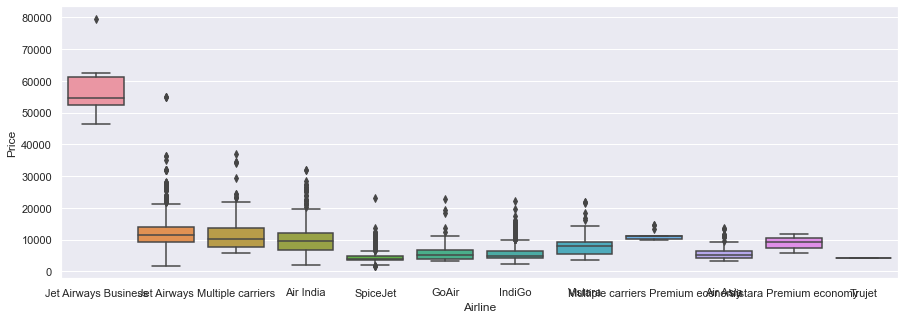

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

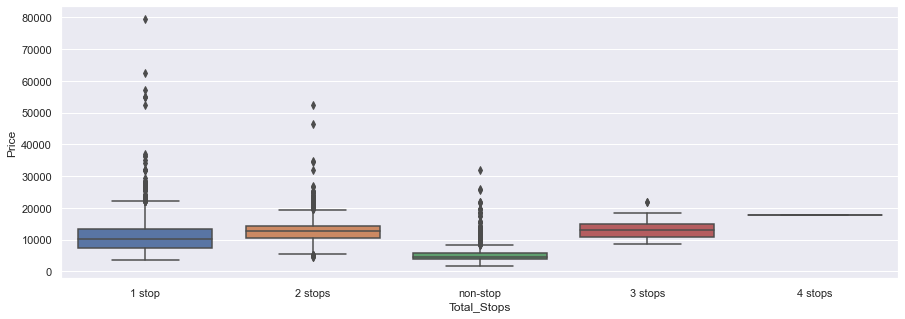

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False))


In [35]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)

In [36]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

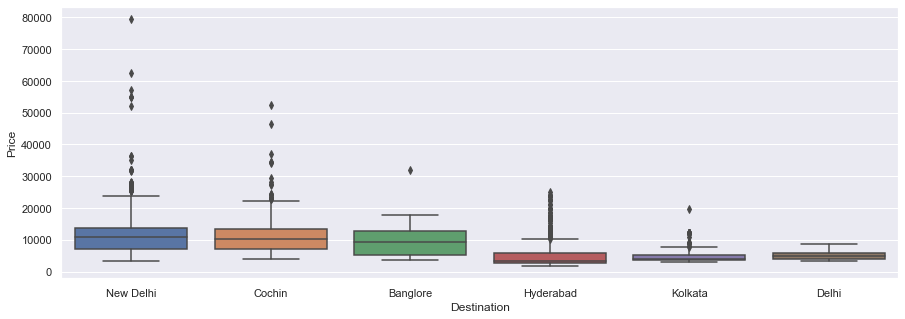

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination', y='Price',data=train_data.sort_values('Price', ascending=False))

In [40]:
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [41]:
categorical['Route'].str.split('→').str[0]

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [42]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]


c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [43]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [44]:
drop_column(categorical, 'Route')

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [46]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [48]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder=LabelEncoder()

In [51]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [52]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [53]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [54]:
drop_column(categorical,'Additional_Info')

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [56]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [57]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [58]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [59]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [60]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24.0,3.0,22,20,1.0,10.0,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5.0,1.0,5,50,13.0,15.0,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6.0,9.0,9,25,4.0,25.0,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5.0,12.0,18,5,23.0,30.0,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3.0,1.0,16,50,21.0,35.0,4,45


In [61]:
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')

In [62]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24.0,3.0,22,20,1.0,10.0,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5.0,1.0,5,50,13.0,15.0,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6.0,9.0,9,25,4.0,25.0,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5.0,12.0,18,5,23.0,30.0,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3.0,1.0,16,50,21.0,35.0,4,45


In [63]:
data_train.isnull().sum()

Total_Stops                            0
Route_1                                0
Route_2                                0
Route_3                                0
Route_4                                0
Route_5                                0
Air India                              0
GoAir                                  0
IndiGo                                 0
Jet Airways                            0
Jet Airways Business                   0
Multiple carriers                      0
Multiple carriers Premium economy      0
SpiceJet                               0
Trujet                                 0
Vistara                                0
Vistara Premium economy                0
Chennai                                0
Delhi                                  0
Kolkata                                0
Mumbai                                 0
Cochin                                 0
Delhi                                  0
Hyderabad                              0
Kolkata         

In [64]:
data_train = data_train.dropna(axis=0, subset=['Journey_day'])
data_train = data_train.dropna(axis=0, subset=['Journey_month'])

In [65]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.displot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


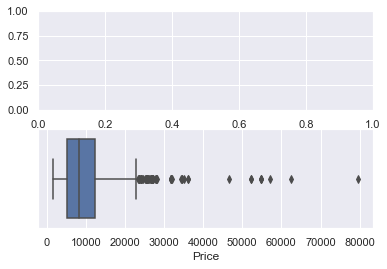

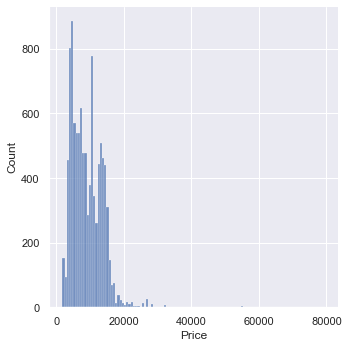

In [66]:
plot(data_train, 'Price')

In [67]:
data_train['Price'] = np.where(data_train['Price']>=40000, data_train['Price'].median(), data_train['Price'])

c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\users\riyay\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


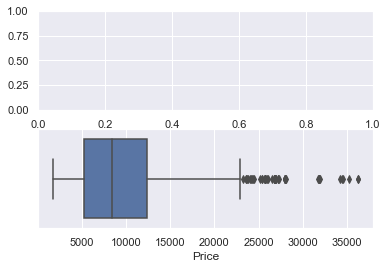

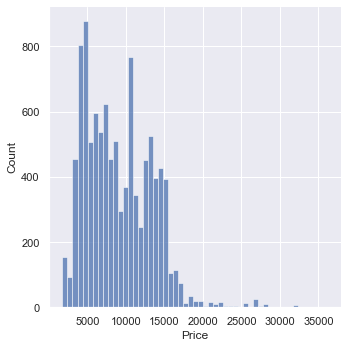

In [68]:
plot(data_train,'Price')

In [69]:
X = data_train.drop('Price', axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24.0,3.0,22,20,1.0,10.0,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.0,1.0,5,50,13.0,15.0,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6.0,9.0,9,25,4.0,25.0,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.0,12.0,18,5,23.0,30.0,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,1.0,16,50,21.0,35.0,4,45


In [70]:
X.shape

(10341, 34)

In [91]:
X.isnull().sum()

Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [90]:
X = X.dropna(axis=0, subset=['Arrival_Time_hour'])
X = X.dropna(axis=0, subset=['Arrival_Time_minute'])

In [92]:
data_train.shape

(10339, 36)

In [93]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10334     4107.0
10335     4145.0
10336     7229.0
10337    12648.0
10338    11753.0
Name: Price, Length: 10339, dtype: float64

In [94]:
data_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,index,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24.0,3.0,22,20,1.0,10.0,2,50
1,1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5.0,1.0,5,50,13.0,15.0,7,25
2,2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6.0,9.0,9,25,4.0,25.0,19,0
3,3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5.0,12.0,18,5,23.0,30.0,5,25
4,4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3.0,1.0,16,50,21.0,35.0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107.0,4.0,9.0,19,55,22.0,25.0,2,30
10335,10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145.0,27.0,4.0,20,45,23.0,20.0,2,35
10336,10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229.0,27.0,4.0,8,20,11.0,20.0,3,0
10337,10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12648.0,3.0,1.0,11,30,14.0,10.0,2,40


In [95]:
from sklearn.feature_selection import mutual_info_classif

In [96]:
mutual_info_classif(X,y)

array([2.13033563e+00, 2.06072095e+00, 2.78007480e+00, 2.25975257e+00,
       1.46769311e+00, 7.49154561e-01, 7.63051704e-01, 8.66300399e-02,
       7.07045264e-01, 9.18445935e-01, 1.38568005e-03, 5.64557928e-01,
       8.66900442e-03, 3.34147626e-01, 7.91403813e-03, 2.15804593e-01,
       1.15386313e-02, 1.76102779e-01, 1.56530802e+00, 8.66594459e-01,
       2.90548046e-01, 1.55132571e+00, 4.31442410e-01, 3.16169812e-01,
       1.61517373e-01, 2.66604952e-01, 1.05291394e+00, 8.51710292e-01,
       1.45851802e+00, 1.24929142e+00, 1.90699022e+00, 1.55833746e+00,
       1.77404697e+00, 1.08480987e+00])

In [97]:
imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

In [98]:
imp

,0
Total_Stops,2.155454
Route_1,2.034634
Route_2,2.809522
Route_3,2.245403
Route_4,1.467683
Route_5,0.785194
Air India,0.733921
GoAir,0.098058
IndiGo,0.686980
Jet Airways,0.913733


In [99]:
imp.columns = ['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route_2,2.809522
Route_3,2.245403
Total_Stops,2.155454
Route_1,2.034634
Arrival_Time_hour,1.899117
Duration_hours,1.793446
Cochin,1.572678
Arrival_Time_minute,1.561241
Delhi,1.541695
Route_4,1.467683


In [100]:
data_train = data_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [101]:
data_train = data_train.replace([np.inf, -np.inf], np.nan)
data_train = data_train.dropna()
data_train = data_train.reset_index()

In [102]:
np.any(np.isnan(data_train))

False

In [103]:
np.all(np.isfinite(data_train))

True

In [104]:
data_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [105]:
data_train = data_train.replace([np.inf, -np.inf], np.nan)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [108]:
from sklearn import metrics
import pickle

In [114]:
def predict(ml_model, dump):
    model=ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are :\n {}'.format(y_prediction))
    print('\n')
    
    R2_Score = metrics.r2_score(y_test, y_prediction)
    print('R2 Score is {}'.format(R2_Score))
    
    print('MAE : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE : ', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test, y_prediction)))
    sns.displot(y_test-y_prediction)
    
    if dump==1:
        file=open(r'C:\Users\riyay\Downloads\flightfareprediction/model.pkl')
        pickle.dump(model,file)

In [115]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

Training Score: 0.9532439404322639
Predictions are :
 [ 3097.17        3558.309      14846.5375     ...  7039.53166667
  8402.38        4088.73      ]


R2 Score is 0.814929409257255
MAE :  1127.6645424875871
MSE :  3353815.7857959275
RMSE:  33.58071682510049


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\riyay\\Downloads\\flightfareprediction/model.pkl'

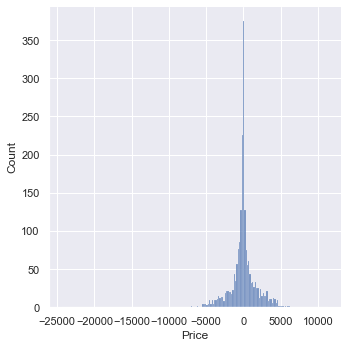

In [118]:
predict(RandomForestRegressor(),1)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


Training Score: 0.6209875081107952
Predictions are :
 [ 3327.25  3643.5  10633.25 ...  6435.75  9924.75  3048.25]


R2 Score is 0.6263993448963031
MAE :  1914.0690280464216
MSE :  6770323.527049081
RMSE:  43.75007460618121


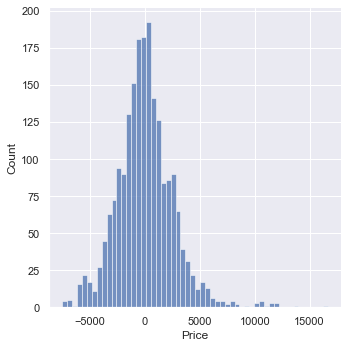

In [120]:
predict(LinearRegression(),0)

Training Score: 0.965710991757929
Predictions are :
 [ 3100.  3543. 16079. ...  7229.  8372.  4282.]


R2 Score is 0.7242826830327109
MAE :  1276.957607994842
MSE :  4996499.370056953
RMSE:  35.734543623710124


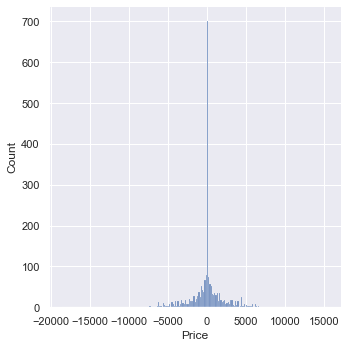

In [121]:
predict(DecisionTreeRegressor(),0)

Training Score: 0.7817075158956985
Predictions are :
 [ 2995.   3564.6 12847.4 ...  7019.2  9123.8  4102.2]


R2 Score is 0.6772990630205487
MAE :  1639.5613152804642
MSE :  5847928.037562863
RMSE:  40.4914968268705


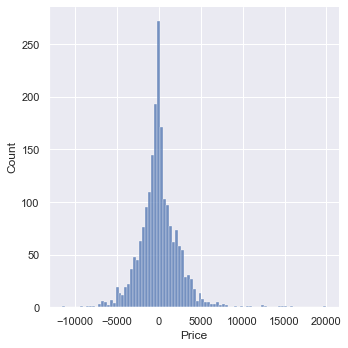

In [122]:
predict(KNeighborsRegressor(),0)

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [125]:
#Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
    
}

In [126]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [127]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))